In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [57]:
subset = data['2019-04-15':'2019-05-30'].mean(axis=1)

In [58]:
subset = subset.to_frame()

In [59]:
subset.columns = ['pm25']

In [60]:
subset['date'] = subset.index.date
subset['time'] = subset.index.time

In [61]:
reshaped = subset.pivot(columns='date', index='time')

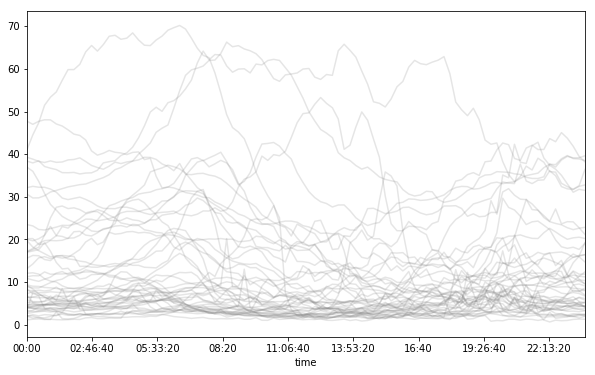

In [62]:
reshaped.plot(legend=False, color='gray', alpha=0.2, figsize=(10, 6))

In [63]:
bycol = reshaped

In [64]:
reshaped['time'] = reshaped.index

In [65]:
reshaped = reshaped.melt(id_vars=['time'])

In [66]:
reshaped['date'] = reshaped['date'].dt.strftime('%Y-%m-%d')

In [67]:
reshaped.head()

,time,None,date,value
0,00:00:00,pm25,2019-04-15,47.747222
1,00:15:00,pm25,2019-04-15,47.009630
2,00:30:00,pm25,2019-04-15,47.714630
3,00:45:00,pm25,2019-04-15,48.070648
4,01:00:00,pm25,2019-04-15,48.056019


In [84]:
bycol = bycol['pm25']

In [104]:
output_file('graphs/interactive_plot.html')
p = figure(width=900, height=500, x_axis_type="datetime") 
p.multi_line(xs=[bycol.index.values]*len(bycol.columns),
                ys=[bycol[name].values for name in bycol],
                line_color='gray',
                line_width=2, alpha=0.2, hover_line_alpha=1.0)
p.add_tools(HoverTool(show_arrow=True,
                      line_policy='nearest', tooltips=[]
                      ))
p.yaxis.axis_label = 'PM2.5'
p.xaxis.axis_label = 'Time'
show(p)